Fitted parameters:
Chi-squared: 2.0189525460271675e-14
reduced chi-squared: 8.47587130993773e-18
Lognormal: A = 0.000742924632108121, mu = 6.278076156015519, sigma = 0.09084719632173587
Gaussian 1: A = -1.409598690784445e-06, mu = 543.1774663802294, sigma = 42.48548932646205
Gaussian 2: A = 6.538941854564814e-07, mu = 600.7434380955197, sigma = 73.45660333474486
Gaussian 3: A = 9.410889326096869e-08, mu = 701.1050878145755, sigma = 101.65029222586128
Gaussian 4: A = 1.2409090373638118e-07, mu = 1148.8922021571664, sigma = 371.31157078839294
Gaussian 5: A = -5.905566394236852e-07, mu = 475.02981915813774, sigma = 23.09157715592921


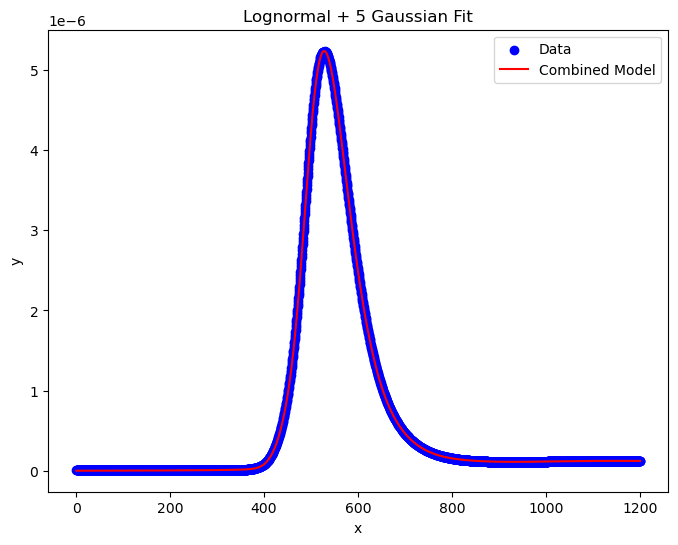

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


data = np.genfromtxt('./data.dat')

# ログノーマル関数の定義
def lognormal(x, A, mu, sigma):
    return A / (x * sigma * np.sqrt(2 * np.pi)) * np.exp(- (np.log(x) - mu)**2 / (2 * sigma**2))

# ガウス関数の定義
def gaussian(x, A, mu, sigma):
    return A * np.exp(- (x - mu)**2 / (2 * sigma**2))

# ログノーマル + 5つのガウスモデルの組み合わせ
def combined_model(x, A_log, mu_log, sigma_log,
                     A1, mu1, sigma1,
                     A2, mu2, sigma2,
                     A3, mu3, sigma3,
                     A4, mu4, sigma4,
                     A5, mu5, sigma5):
    """
    モデル関数: ログノーマル + 5つのガウス関数の線形結合
    """
    lognorm = lognormal(x, A_log, mu_log, sigma_log)
    gauss1 = gaussian(x, A1, mu1, sigma1)
    gauss2 = gaussian(x, A2, mu2, sigma2)
    gauss3 = gaussian(x, A3, mu3, sigma3)
    gauss4 = gaussian(x, A4, mu4, sigma4)
    gauss5 = gaussian(x, A5, mu5, sigma5)
    
    return lognorm + gauss1 + gauss2 + gauss3 + gauss4 + gauss5


xdata = np.array(data[:, 0])
ydata = np.array(data[:, 1])

# フィッティング
# 初期値の設定
p0 = [1, np.log(np.mean(xdata)), 1,  # ログノーマルの初期値
      1, np.mean(xdata), 1,  # 1つ目のガウス
      1, np.mean(xdata)*1.2, 1,  # 2つ目のガウス
      1, np.mean(xdata)*1.4, 1,  # 3つ目のガウス
      1, np.mean(xdata)*1.6, 1,  # 4つ目のガウス
      1, np.mean(xdata)*0.8, 1]  # 5つ目のガウス

# curve_fitを用いて最適化
popt, pcov = curve_fit(combined_model, xdata, ydata, p0=p0, maxfev=5000)

# カイ二乗の計算
y_fit_data = combined_model(xdata, *popt)  # データポイントでのフィット値
residuals = ydata - y_fit_data            # 残差
chi_squared = np.sum((residuals)**2)     # カイ二乗値 (誤差を1と仮定)
reduced_chi_squared = chi_squared / (len(ydata) - len(popt))  # 自由度で割る

# 最適化結果の表示
A_log, mu_log, sigma_log, A1, mu1, sigma1, A2, mu2, sigma2, A3, mu3, sigma3, A4, mu4, sigma4, A5, mu5, sigma5 = popt
print("Fitted parameters:")
print(f'Chi-squared: {chi_squared}')
print(f'reduced chi-squared: {reduced_chi_squared}')
print(f"Lognormal: A = {A_log}, mu = {mu_log}, sigma = {sigma_log}")
print(f"Gaussian 1: A = {A1}, mu = {mu1}, sigma = {sigma1}")
print(f"Gaussian 2: A = {A2}, mu = {mu2}, sigma = {sigma2}")
print(f"Gaussian 3: A = {A3}, mu = {mu3}, sigma = {sigma3}")
print(f"Gaussian 4: A = {A4}, mu = {mu4}, sigma = {sigma4}")
print(f"Gaussian 5: A = {A5}, mu = {mu5}, sigma = {sigma5}")

# プロット用のデータ生成
x_fit = np.linspace(min(xdata), max(xdata), 1000)
y_fit = combined_model(x_fit, *popt)

# プロット
plt.figure(figsize=(8, 6))
plt.scatter(xdata, ydata, label="Data", color="blue")
plt.plot(x_fit, y_fit, label="Combined Model", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Lognormal + 5 Gaussian Fit")
plt.show()

Fitted parameters:
Chi-squared: 7.264338547275411e-13
reduced chi-squared: 3.045844254622814e-16
Lognormal: A = 0.0006958040766977115, mu = 6.292789011773518, sigma = 0.09067786199274608
Gaussian 1: A = -8.169333763413994e-07, mu = 560.6826636407911, sigma = 27.58503262197233
Gaussian 2: A = 2.54948402661953e-07, mu = 656.3964871401387, sigma = 32.1459215691162
Gaussian 3: A = 1.9893328877436285e-07, mu = 703.2723248019659, sigma = 59.25730588891589
Gaussian 4: A = 1.2306205278883204e-07, mu = 1061.4207387188872, sigma = 405.3453929882518


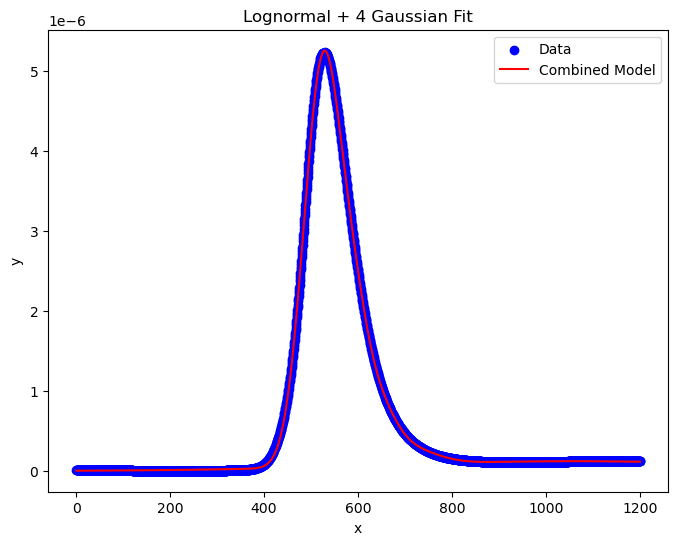

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


data = np.genfromtxt('./data.dat')

# ログノーマル関数の定義
def lognormal(x, A, mu, sigma):
    return A / (x * sigma * np.sqrt(2 * np.pi)) * np.exp(- (np.log(x) - mu)**2 / (2 * sigma**2))

# ガウス関数の定義
def gaussian(x, A, mu, sigma):
    return A * np.exp(- (x - mu)**2 / (2 * sigma**2))

# ログノーマル + 5つのガウスモデルの組み合わせ
def combined_model(x, A_log, mu_log, sigma_log,
                     A1, mu1, sigma1,
                     A2, mu2, sigma2,
                     A3, mu3, sigma3,
                     A4, mu4, sigma4,):
    """
    モデル関数: ログノーマル + 5つのガウス関数の線形結合
    """
    lognorm = lognormal(x, A_log, mu_log, sigma_log)
    gauss1 = gaussian(x, A1, mu1, sigma1)
    gauss2 = gaussian(x, A2, mu2, sigma2)
    gauss3 = gaussian(x, A3, mu3, sigma3)
    gauss4 = gaussian(x, A4, mu4, sigma4)
    
    return lognorm + gauss1 + gauss2 + gauss3 + gauss4

xdata = np.array(data[:, 0])
ydata = np.array(data[:, 1])

# フィッティング
# 初期値の設定
p0 = [1, np.log(np.mean(xdata)), 1,  # ログノーマルの初期値
      1, np.mean(xdata), 1,  # 1つ目のガウス
      1, np.mean(xdata)*1.2, 1,  # 2つ目のガウス
      1, np.mean(xdata)*1.4, 1,  # 3つ目のガウス
      1, np.mean(xdata)*1.6, 1,  # 4つ目のガウス
      ]

# curve_fitを用いて最適化
popt, pcov = curve_fit(combined_model, xdata, ydata, p0=p0, maxfev=5000)

# カイ二乗の計算
y_fit_data = combined_model(xdata, *popt)  # データポイントでのフィット値
residuals = ydata - y_fit_data            # 残差
chi_squared = np.sum((residuals)**2)     # カイ二乗値 (誤差を1と仮定)
reduced_chi_squared = chi_squared / (len(ydata) - len(popt))  # 自由度で割る

# 最適化結果の表示
A_log, mu_log, sigma_log, A1, mu1, sigma1, A2, mu2, sigma2, A3, mu3, sigma3, A4, mu4, sigma4 = popt
print("Fitted parameters:")
print(f'Chi-squared: {chi_squared}')
print(f'reduced chi-squared: {reduced_chi_squared}')
print(f"Lognormal: A = {A_log}, mu = {mu_log}, sigma = {sigma_log}")
print(f"Gaussian 1: A = {A1}, mu = {mu1}, sigma = {sigma1}")
print(f"Gaussian 2: A = {A2}, mu = {mu2}, sigma = {sigma2}")
print(f"Gaussian 3: A = {A3}, mu = {mu3}, sigma = {sigma3}")
print(f"Gaussian 4: A = {A4}, mu = {mu4}, sigma = {sigma4}")

# プロット用のデータ生成
x_fit = np.linspace(min(xdata), max(xdata), 1000)
y_fit = combined_model(x_fit, *popt)

# プロット
plt.figure(figsize=(8, 6))
plt.scatter(xdata, ydata, label="Data", color="blue")
plt.plot(x_fit, y_fit, label="Combined Model", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Lognormal + 4 Gaussian Fit")
plt.show()

Fitted parameters:
Chi-squared: 6.29711478012376e-14
reduced chi-squared: 2.6402996981650985e-17
Gaussian 1: A = 3.214623437510403e-06, mu = 527.3665427682067, sigma = 42.28236941280779
Gaussian 2: A = 1.719336529052149e-06, mu = 568.3032612856414, sigma = 61.54330449832461
Gaussian 3: A = 2.492382137033651e-07, mu = 659.1161426033542, sigma = 90.01881003548219
Gaussian 4: A = 1.2406502188733262e-07, mu = 1106.8335226072238, sigma = 339.98870113500897
Gaussian 5: A = 6.840011817447928e-07, mu = 510.8449861536509, sigma = 23.57558051417581


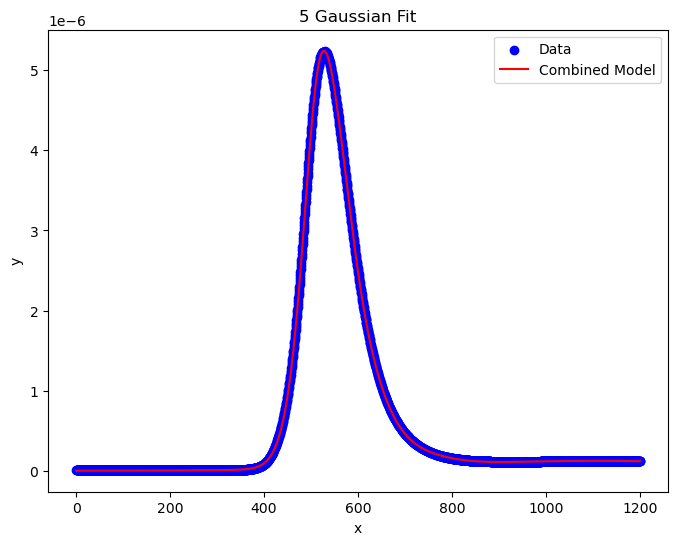

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


data = np.genfromtxt('./data.dat')

# ガウス関数の定義
def gaussian(x, A, mu, sigma):
    return A * np.exp(- (x - mu)**2 / (2 * sigma**2))

# ログノーマル + 5つのガウスモデルの組み合わせ
def combined_model(x, A1, mu1, sigma1,
                      A2, mu2, sigma2,
                      A3, mu3, sigma3,
                      A4, mu4, sigma4,
                      A5, mu5, sigma5):
    """
    モデル関数: ログノーマル + 5つのガウス関数の線形結合
    """
    gauss1 = gaussian(x, A1, mu1, sigma1)
    gauss2 = gaussian(x, A2, mu2, sigma2)
    gauss3 = gaussian(x, A3, mu3, sigma3)
    gauss4 = gaussian(x, A4, mu4, sigma4)
    gauss5 = gaussian(x, A5, mu5, sigma5)
    
    return gauss1 + gauss2 + gauss3 + gauss4 + gauss5


xdata = np.array(data[:, 0])
ydata = np.array(data[:, 1])

# フィッティング
# 初期値の設定
p0 = [1, np.mean(xdata), 1,  # 1つ目のガウス
      1, np.mean(xdata)*1.2, 1,  # 2つ目のガウス
      1, np.mean(xdata)*1.4, 1,  # 3つ目のガウス
      1, np.mean(xdata)*1.6, 1,  # 4つ目のガウス
      1, np.mean(xdata)*0.8, 1]  # 5つ目のガウス

# curve_fitを用いて最適化
popt, pcov = curve_fit(combined_model, xdata, ydata, p0=p0)

# カイ二乗の計算
y_fit_data = combined_model(xdata, *popt)  # データポイントでのフィット値
residuals = ydata - y_fit_data            # 残差
chi_squared = np.sum((residuals)**2)     # カイ二乗値 (誤差を1と仮定)
reduced_chi_squared = chi_squared / (len(ydata) - len(popt))  # 自由度で割る

# 最適化結果の表示
A1, mu1, sigma1, A2, mu2, sigma2, A3, mu3, sigma3, A4, mu4, sigma4, A5, mu5, sigma5 = popt
print("Fitted parameters:")
print(f'Chi-squared: {chi_squared}')
print(f'reduced chi-squared: {reduced_chi_squared}')
print(f"Gaussian 1: A = {A1}, mu = {mu1}, sigma = {sigma1}")
print(f"Gaussian 2: A = {A2}, mu = {mu2}, sigma = {sigma2}")
print(f"Gaussian 3: A = {A3}, mu = {mu3}, sigma = {sigma3}")
print(f"Gaussian 4: A = {A4}, mu = {mu4}, sigma = {sigma4}")
print(f"Gaussian 5: A = {A5}, mu = {mu5}, sigma = {sigma5}")

# プロット用のデータ生成
x_fit = np.linspace(min(xdata), max(xdata), 1000)
y_fit = combined_model(x_fit, *popt)

# プロット
plt.figure(figsize=(8, 6))
plt.scatter(xdata, ydata, label="Data", color="blue")
plt.plot(x_fit, y_fit, label="Combined Model", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("5 Gaussian Fit")
plt.show()

Fitted parameters:
Chi-squared: 2.292519242602371e-13
reduced chi-squared: 9.600164332505741e-17
Gaussian 1: A = 1.9580374609217634e-06, mu = 515.7036239163674, sigma = 31.443484553944227
Gaussian 2: A = 3.1940989091305547e-06, mu = 543.739564943419, sigma = 51.424991838982514
Gaussian 3: A = 6.576106384459944e-07, mu = 615.5277440663418, sigma = 79.61065355599035
Gaussian 4: A = 1.2555668090594964e-07, mu = 1046.2075817194266, sigma = 326.75820475393334


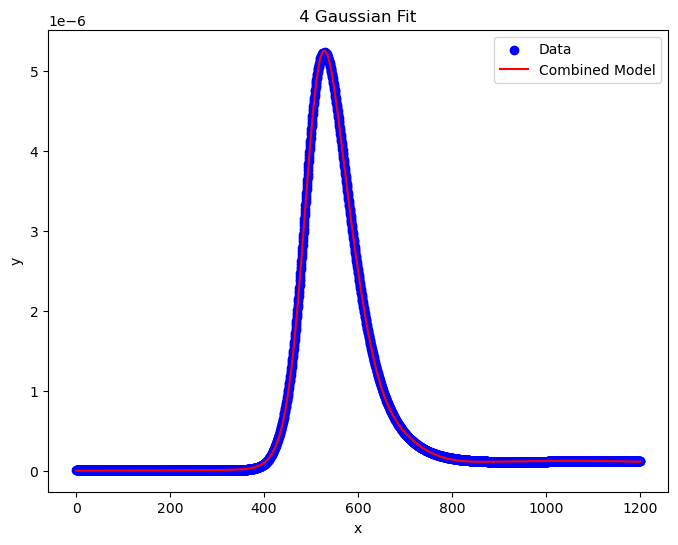

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


data = np.genfromtxt('./data.dat')

# ガウス関数の定義
def gaussian(x, A, mu, sigma):
    return A * np.exp(- (x - mu)**2 / (2 * sigma**2))

# ログノーマル + 5つのガウスモデルの組み合わせ
def combined_model(x, A1, mu1, sigma1,
                      A2, mu2, sigma2,
                      A3, mu3, sigma3,
                      A4, mu4, sigma4):
    """
    モデル関数: ログノーマル + 5つのガウス関数の線形結合
    """
    gauss1 = gaussian(x, A1, mu1, sigma1)
    gauss2 = gaussian(x, A2, mu2, sigma2)
    gauss3 = gaussian(x, A3, mu3, sigma3)
    gauss4 = gaussian(x, A4, mu4, sigma4)
    
    return gauss1 + gauss2 + gauss3 + gauss4


xdata = np.array(data[:, 0])
ydata = np.array(data[:, 1])

# フィッティング
# 初期値の設定
p0 = [1, np.mean(xdata), 1,  # 1つ目のガウス
      1, np.mean(xdata)*1.2, 1,  # 2つ目のガウス
      1, np.mean(xdata)*1.4, 1,  # 3つ目のガウス
      1, np.mean(xdata)*1.6, 1,  # 4つ目のガウス
      ]

# curve_fitを用いて最適化
popt, pcov = curve_fit(combined_model, xdata, ydata, p0=p0)

# カイ二乗の計算
y_fit_data = combined_model(xdata, *popt)  # データポイントでのフィット値
residuals = ydata - y_fit_data            # 残差
chi_squared = np.sum((residuals)**2)     # カイ二乗値 (誤差を1と仮定)
reduced_chi_squared = chi_squared / (len(ydata) - len(popt))  # 自由度で割る

# 最適化結果の表示
A1, mu1, sigma1, A2, mu2, sigma2, A3, mu3, sigma3, A4, mu4, sigma4 = popt
print("Fitted parameters:")
print(f'Chi-squared: {chi_squared}')
print(f'reduced chi-squared: {reduced_chi_squared}')
print(f"Gaussian 1: A = {A1}, mu = {mu1}, sigma = {sigma1}")
print(f"Gaussian 2: A = {A2}, mu = {mu2}, sigma = {sigma2}")
print(f"Gaussian 3: A = {A3}, mu = {mu3}, sigma = {sigma3}")
print(f"Gaussian 4: A = {A4}, mu = {mu4}, sigma = {sigma4}")

# プロット用のデータ生成
x_fit = np.linspace(min(xdata), max(xdata), 1000)
y_fit = combined_model(x_fit, *popt)

# プロット
plt.figure(figsize=(8, 6))
plt.scatter(xdata, ydata, label="Data", color="blue")
plt.plot(x_fit, y_fit, label="Combined Model", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("4 Gaussian Fit")
plt.show()

Fitted parameters:
Chi-squared: 4.428429441050733e-13
reduced chi-squared: 1.8544511897197373e-16
Lognormal: A = 0.0005824929124534908, mu = 6.286240974939256, sigma = 0.08356800944696899
Gaussian 1: A = -9.133322542659401e-07, mu = 555.8244791344692, sigma = 30.733943355468682
Gaussian 2: A = 8.592992257339373e-07, mu = 589.545127692951, sigma = 86.95192008711224
Gaussian 3: A = 1.2620676553844432e-07, mu = 1041.8361068004726, sigma = 309.2171852447002


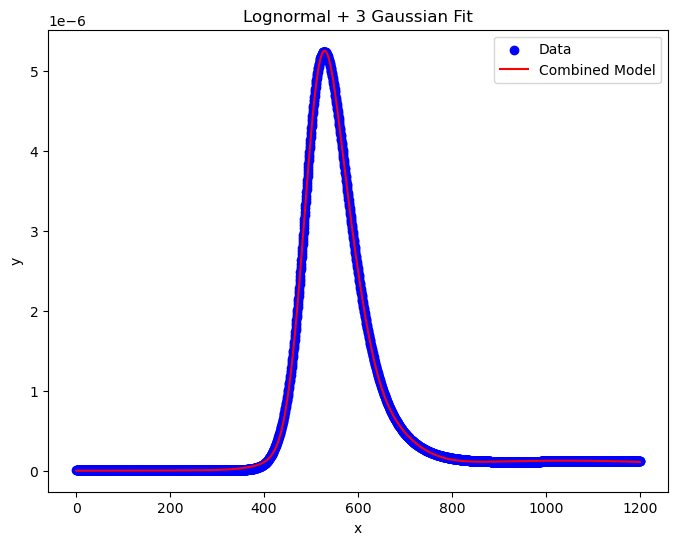

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


data = np.genfromtxt('./data.dat')

# ログノーマル関数の定義
def lognormal(x, A, mu, sigma):
    return A / (x * sigma * np.sqrt(2 * np.pi)) * np.exp(- (np.log(x) - mu)**2 / (2 * sigma**2))

# ガウス関数の定義
def gaussian(x, A, mu, sigma):
    return A * np.exp(- (x - mu)**2 / (2 * sigma**2))

# ログノーマル + 5つのガウスモデルの組み合わせ
def combined_model(x, A_log, mu_log, sigma_log,
                     A1, mu1, sigma1,
                     A2, mu2, sigma2,
                     A3, mu3, sigma3):
    """
    モデル関数: ログノーマル + 5つのガウス関数の線形結合
    """
    lognorm = lognormal(x, A_log, mu_log, sigma_log)
    gauss1 = gaussian(x, A1, mu1, sigma1)
    gauss2 = gaussian(x, A2, mu2, sigma2)
    gauss3 = gaussian(x, A3, mu3, sigma3)
    
    return lognorm + gauss1 + gauss2 + gauss3

xdata = np.array(data[:, 0])
ydata = np.array(data[:, 1])

# フィッティング
# 初期値の設定
p0 = [1, np.log(np.mean(xdata)), 1,  # ログノーマルの初期値
      1, np.mean(xdata), 1,  # 1つ目のガウス
      1, np.mean(xdata)*1.2, 1,  # 2つ目のガウス
      1, np.mean(xdata)*1.4, 1,  # 3つ目のガウス
      ]

# curve_fitを用いて最適化
popt, pcov = curve_fit(combined_model, xdata, ydata, p0=p0, maxfev=5000)

# カイ二乗の計算
y_fit_data = combined_model(xdata, *popt)  # データポイントでのフィット値
residuals = ydata - y_fit_data            # 残差
chi_squared = np.sum((residuals)**2)     # カイ二乗値 (誤差を1と仮定)
reduced_chi_squared = chi_squared / (len(ydata) - len(popt))  # 自由度で割る

# 最適化結果の表示
A_log, mu_log, sigma_log, A1, mu1, sigma1, A2, mu2, sigma2, A3, mu3, sigma3 = popt
print("Fitted parameters:")
print(f'Chi-squared: {chi_squared}')
print(f'reduced chi-squared: {reduced_chi_squared}')
print(f"Lognormal: A = {A_log}, mu = {mu_log}, sigma = {sigma_log}")
print(f"Gaussian 1: A = {A1}, mu = {mu1}, sigma = {sigma1}")
print(f"Gaussian 2: A = {A2}, mu = {mu2}, sigma = {sigma2}")
print(f"Gaussian 3: A = {A3}, mu = {mu3}, sigma = {sigma3}")

# プロット用のデータ生成
x_fit = np.linspace(min(xdata), max(xdata), 1000)
y_fit = combined_model(x_fit, *popt)

# プロット
plt.figure(figsize=(8, 6))
plt.scatter(xdata, ydata, label="Data", color="blue")
plt.plot(x_fit, y_fit, label="Combined Model", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Lognormal + 3 Gaussian Fit")
plt.show()

Fitted parameters:
Chi-squared: 1.7517927641817363e-11
reduced chi-squared: 7.31743009265554e-15
Lognormal: A = 0.0018514447324559642, mu = 6.32231087192334, sigma = 0.10371452327803803
Gaussian 1: A = -8.287410343974066e-06, mu = 564.7045673455602, sigma = 55.11647793205481


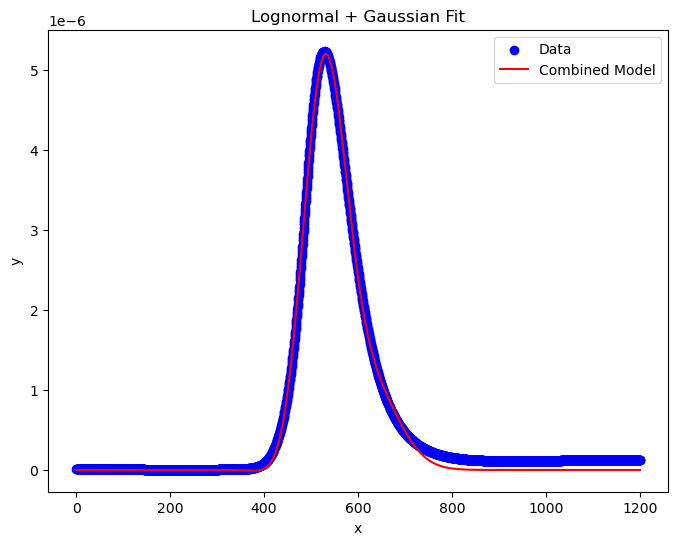

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


data = np.genfromtxt('./data.dat')

# ログノーマル関数の定義
def lognormal(x, A, mu, sigma):
    return A / (x * sigma * np.sqrt(2 * np.pi)) * np.exp(- (np.log(x) - mu)**2 / (2 * sigma**2))

# ガウス関数の定義
def gaussian(x, A, mu, sigma):
    return A * np.exp(- (x - mu)**2 / (2 * sigma**2))

# ログノーマル + 5つのガウスモデルの組み合わせ
def combined_model(x, A_log, mu_log, sigma_log,
                     A1, mu1, sigma1):
    """
    モデル関数: ログノーマル + 5つのガウス関数の線形結合
    """
    lognorm = lognormal(x, A_log, mu_log, sigma_log)
    gauss1 = gaussian(x, A1, mu1, sigma1)
    
    return lognorm + gauss1

xdata = np.array(data[:, 0])
ydata = np.array(data[:, 1])

# フィッティング
# 初期値の設定
p0 = [1, np.log(np.mean(xdata)), 1,  # ログノーマルの初期値
      1, np.mean(xdata), 1,  # 1つ目のガウス
      ]

# curve_fitを用いて最適化
popt, pcov = curve_fit(combined_model, xdata, ydata, p0=p0, maxfev=5000)

# カイ二乗の計算
y_fit_data = combined_model(xdata, *popt)  # データポイントでのフィット値
residuals = ydata - y_fit_data            # 残差
chi_squared = np.sum((residuals)**2)     # カイ二乗値 (誤差を1と仮定)
reduced_chi_squared = chi_squared / (len(ydata) - len(popt))  # 自由度で割る

# 最適化結果の表示
A_log, mu_log, sigma_log, A1, mu1, sigma1 = popt
print("Fitted parameters:")
print(f'Chi-squared: {chi_squared}')
print(f'reduced chi-squared: {reduced_chi_squared}')
print(f"Lognormal: A = {A_log}, mu = {mu_log}, sigma = {sigma_log}")
print(f"Gaussian 1: A = {A1}, mu = {mu1}, sigma = {sigma1}")

# プロット用のデータ生成
x_fit = np.linspace(min(xdata), max(xdata), 1000)
y_fit = combined_model(x_fit, *popt)

# プロット
plt.figure(figsize=(8, 6))
plt.scatter(xdata, ydata, label="Data", color="blue")
plt.plot(x_fit, y_fit, label="Combined Model", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Lognormal + Gaussian Fit")
plt.show()